In [ ]:
# from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from glob import glob


def get_data(my_dir):
    num_good_traj = 0
    
    exps = glob(my_dir+'*')
    d = exps[0]
    df = load_results(d)
    #df = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000

    df['perf']= df['r']

    return df

my_dir = 'RUNS/exp_test_reacher_meta_6'
#my_dir = 'RUNS/exp_test_ll_10'
my_dir = '../RUNS/exp_meta_hopper_1'
df = get_data(my_dir)



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))


roll = 1
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('META-PPO CHEETAH ALBERT',total_time/3600, total_steps/total_time))
df[['f','r']].rolling(roll).mean().iloc[0:-1:40].plot('f','r',  ax=ax,label='ppo meta')

ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, 20))
ax.grid(True)
#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))

Text(0.5, 1.0, 'Total meta loss')

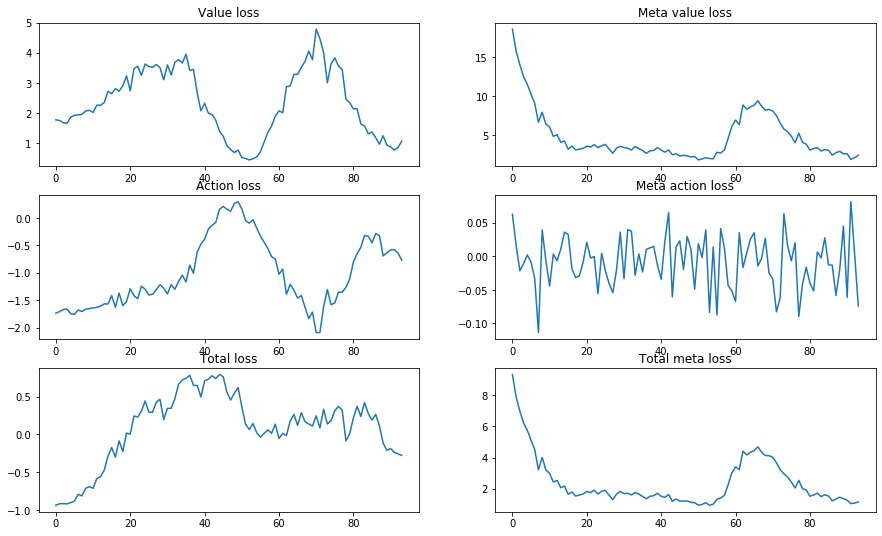

In [625]:
my_dir = 'RUNS/exp_test_ll_10/loss_monitor/loss_monitor.csv'
my_dir = 'RUNS/exp_test_reacher_meta_6/loss_monitor/loss_monitor.csv'
my_dir = 'RUNS/exp_meta_cheetah_test/loss_monitor/loss_monitor.csv'
data = pd.read_csv(my_dir) 
fig, axs = plt.subplots(3, 2, figsize=(15,9))
axs[0, 0].plot(data['V_loss'])
axs[0, 0].set_title('Value loss')
axs[0, 1].plot(data['meta_value_loss'])
axs[0, 1].set_title('Meta value loss')
axs[1, 0].plot(data['action_loss'])
axs[1, 0].set_title('Action loss')
axs[1, 1].plot(data['meta_action_loss'])
axs[1, 1].set_title('Meta action loss')
axs[2, 0].plot(data['loss'])
axs[2, 0].set_title('Total loss')
axs[2, 1].plot(data['meta_loss'])
axs[2, 1].set_title('Total meta loss')

In [620]:
data['meta_value_loss']

0     18.542673
1     15.741318
2     14.002505
3     12.466262
4     11.501236
        ...    
88     2.967286
89     2.650676
90     2.673014
91     1.941083
92     2.161327
Name: meta_value_loss, Length: 93, dtype: float64

In [223]:
df[['f','r']]

,f,r
0,0.00015,-159.048733
1,0.00030,-58.526180
2,0.00045,-35.590156
3,0.00060,-35.600972
4,0.00075,-62.887875
...,...,...
298875,44.83140,-2.219985
298876,44.83155,-19.183726
298877,44.83170,-19.445163
298878,44.83185,-13.641109
